In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("FPA_FOD_20170508.sqlite")
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)

[('spatial_ref_sys',), ('spatialite_history',), ('sqlite_sequence',), ('geometry_columns',), ('spatial_ref_sys_aux',), ('views_geometry_columns',), ('virts_geometry_columns',), ('geometry_columns_statistics',), ('views_geometry_columns_statistics',), ('virts_geometry_columns_statistics',), ('geometry_columns_field_infos',), ('views_geometry_columns_field_infos',), ('virts_geometry_columns_field_infos',), ('geometry_columns_time',), ('geometry_columns_auth',), ('views_geometry_columns_auth',), ('virts_geometry_columns_auth',), ('sql_statements_log',), ('SpatialIndex',), ('ElementaryGeometries',), ('KNN',), ('Fires',), ('idx_Fires_Shape',), ('idx_Fires_Shape_node',), ('idx_Fires_Shape_rowid',), ('idx_Fires_Shape_parent',), ('NWCG_UnitIDActive_20170109',)]


In [2]:
Fires = pd.read_sql_query("SELECT * from Fires", conn)
Fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
costs = pd.read_csv('Federal Firefighting Costs (Suppression Only).csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           36 non-null     int64 
 1   Fires          36 non-null     object
 2   Acres          36 non-null     object
 3   ForestService  36 non-null     object
 4   DOIAgencies    36 non-null     object
 5   Total          36 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.8+ KB


In [5]:
costs.rename(columns={'Year': 'FIRE_YEAR'}, inplace=True)
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FIRE_YEAR      36 non-null     int64 
 1   Fires          36 non-null     object
 2   Acres          36 non-null     object
 3   ForestService  36 non-null     object
 4   DOIAgencies    36 non-null     object
 5   Total          36 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.8+ KB


In [6]:
Fires_costs = pd.merge(Fires, costs, on='FIRE_YEAR', how='inner')

Fires_costs['FIRE_SIZE'].value_counts()

0.10000    459145
1.00000    221680
0.50000    113222
2.00000    109493
0.20000     75302
            ...  
1.15682         1
0.04362         1
0.21876         1
0.15317         1
6.10000         1
Name: FIRE_SIZE, Length: 13637, dtype: int64

In [7]:
conda install -c conda-forge folium

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install folium --upgrade


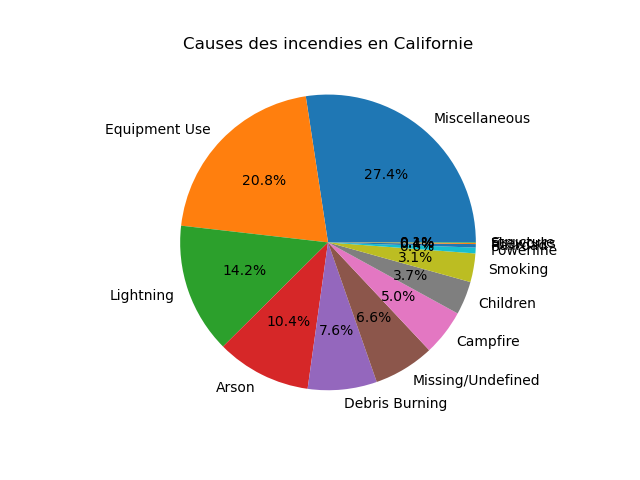

In [9]:
import folium
from folium import plugins
import matplotlib.pyplot as plt
import pandas as pd
import base64

# Votre code existant pour créer la carte Folium
c = folium.Map(location=[38.575764, -121.478851])

# Votre code existant pour créer le repère
marker = folium.Marker(location=[38.575764, -121.478851],
    icon=folium.Icon(color='blue'))

# Créer le graphique CA en camembert
Fires_california = Fires_costs[Fires_costs['STATE'] == 'CA']
cause = Fires_california['STAT_CAUSE_DESCR'].value_counts()
fig, ax = plt.subplots()
ax.pie(cause, labels=cause.index, autopct='%1.1f%%')
ax.set_title('Causes des incendies en Californie')


# Sauvegarder le graphique en tant qu'image
cause_CA = 'cause_CA.png'
plt.savefig(cause_CA)
plt.close()

# Convertir l'image
with open(cause_CA, 'rb') as f:
    image_base64 = base64.b64encode(f.read()).decode('utf-8')

# Incorporer l'image dans le contenu HTML du tooltip
tooltip_html = '''
<b>Coordonnées :</b> [38.575764, -121.478851]<br>
<img src="data:image/png;base64,{}">
'''.format(image_base64)

# Ajouter le tooltip au repère
marker.add_child(folium.Tooltip(tooltip_html, sticky=True))

# Ajouter le repère à la carte
marker_cluster = folium.plugins.MarkerCluster().add_child(marker)
c.add_child(marker_cluster)

# Afficher la carte
c



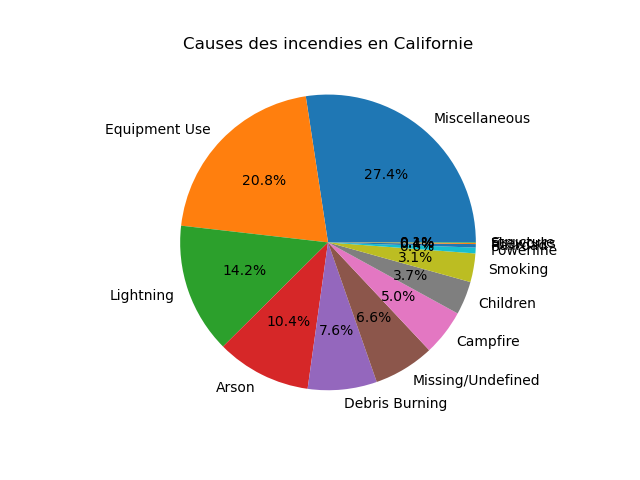
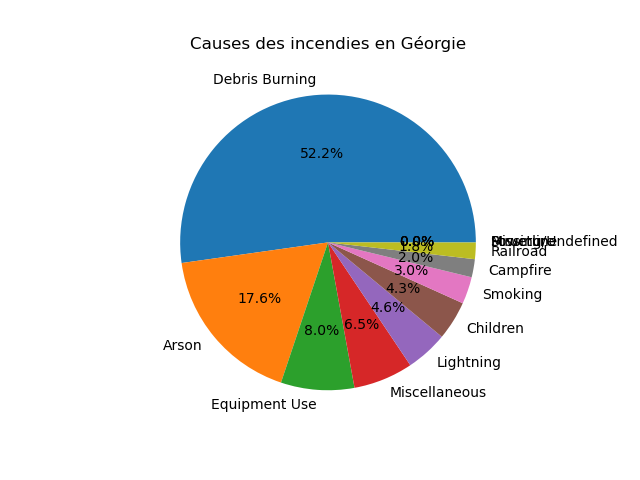
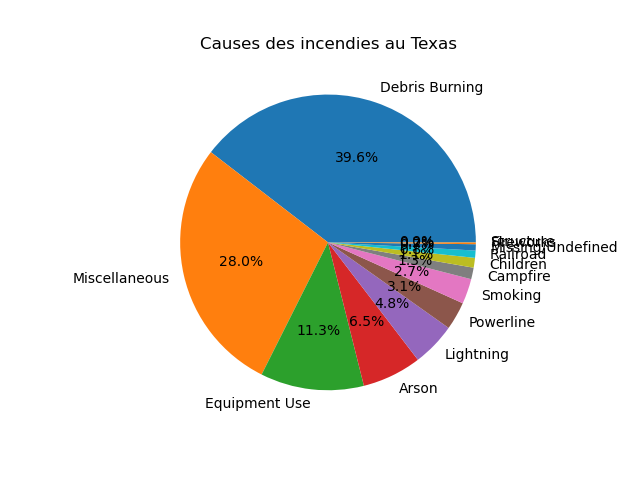
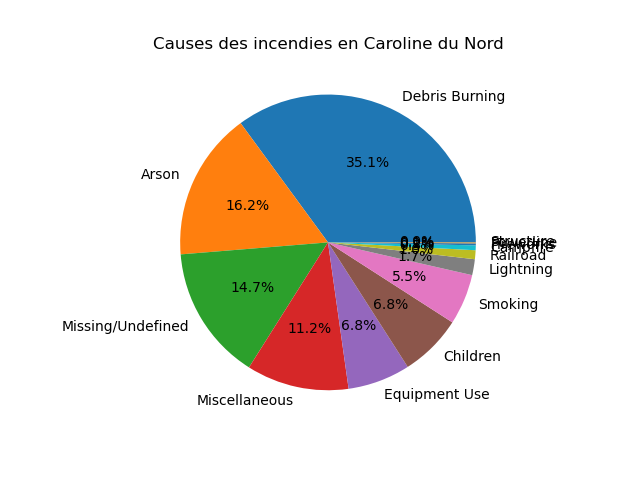
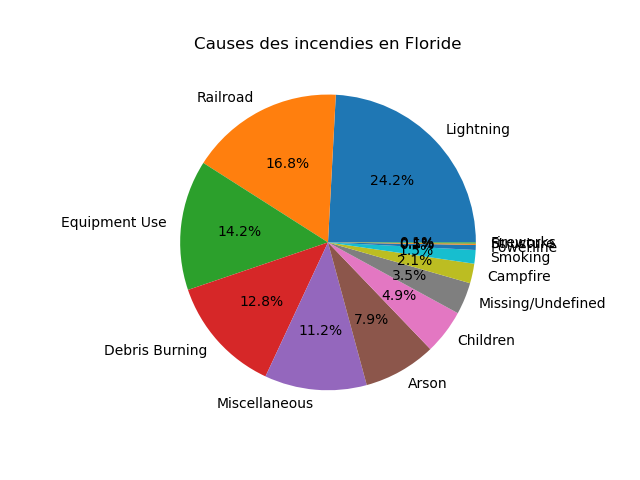

In [10]:
#Georgie-GA
Atlanta = folium.Marker(location=[33.7489954, -84.3879824], icon=folium.Icon(color='red'))
c.add_child(Atlanta)

Fires_GA = Fires_costs[Fires_costs['STATE'] == 'GA']
cause = Fires_GA['STAT_CAUSE_DESCR'].value_counts()
fig, ax = plt.subplots()
ax.pie(cause, labels=cause.index, autopct='%1.1f%%')
ax.set_title('Causes des incendies en Géorgie')

cause_GA = 'cause_GA.png'
plt.savefig(cause_GA)
plt.close()

with open(cause_GA, 'rb') as f:
    image_base64 = base64.b64encode(f.read()).decode('utf-8')
    
tooltip_html = '''
<b>Coordonnées :</b> [33.7489954, -84.3879824]<br>
<img src="data:image/png;base64,{}">
'''.format(image_base64)

Atlanta.add_child(folium.Tooltip(tooltip_html, sticky=True))


#Texas-TX
Austin = folium.Marker(location=[30.267153, -97.7430608], icon=folium.Icon(color='orange'))
c.add_child(Austin)

Fires_TX = Fires_costs[Fires_costs['STATE'] == 'TX']
cause = Fires_TX['STAT_CAUSE_DESCR'].value_counts()
fig, ax = plt.subplots()
ax.pie(cause, labels=cause.index, autopct='%1.1f%%')
ax.set_title('Causes des incendies au Texas')

cause_TX = 'cause_TX.png'
plt.savefig(cause_TX)
plt.close()

with open(cause_TX, 'rb') as f:
    image_base64 = base64.b64encode(f.read()).decode('utf-8')
    
tooltip_html = '''
<b>Coordonnées :</b> [33.7489954, -84.3879824]<br>
<img src="data:image/png;base64,{}">
'''.format(image_base64)

Austin.add_child(folium.Tooltip(tooltip_html, sticky=True))

#Caroline du Nord-NC
Raleigh = folium.Marker(location=[35.7795897, -78.6381787], icon=folium.Icon(color='pink'))
c.add_child(Raleigh)

Fires_NC = Fires_costs[Fires_costs['STATE'] == 'NC']
cause = Fires_NC['STAT_CAUSE_DESCR'].value_counts()
fig, ax = plt.subplots()
ax.pie(cause, labels=cause.index, autopct='%1.1f%%')
ax.set_title('Causes des incendies en Caroline du Nord')

cause_NC = 'cause_NC.png'
plt.savefig(cause_NC)
plt.close()

with open(cause_NC, 'rb') as f:
    image_base64 = base64.b64encode(f.read()).decode('utf-8')
    
tooltip_html = '''
<b>Coordonnées :</b> [33.7489954, -84.3879824]<br>
<img src="data:image/png;base64,{}">
'''.format(image_base64)

Raleigh.add_child(folium.Tooltip(tooltip_html, sticky=True))


#Floride-FL
Tallahassee = folium.Marker(location=[30.4382559, -84.2807329], icon=folium.Icon(color='green'))
c.add_child(Tallahassee)

Fires_FL = Fires_costs[Fires_costs['STATE'] == 'FL']
cause = Fires_FL['STAT_CAUSE_DESCR'].value_counts()
fig, ax = plt.subplots()
ax.pie(cause, labels=cause.index, autopct='%1.1f%%')
ax.set_title('Causes des incendies en Floride')

cause_FL = 'cause_FL.png'
plt.savefig(cause_FL)
plt.close()

with open(cause_FL, 'rb') as f:
    image_base64 = base64.b64encode(f.read()).decode('utf-8')
    
tooltip_html = '''
<b>Coordonnées :</b> [33.7489954, -84.3879824]<br>
<img src="data:image/png;base64,{}">
'''.format(image_base64)

Tallahassee.add_child(folium.Tooltip(tooltip_html, sticky=True))

#génération de la carte
c

In [27]:
#Carte des 15 plus grands incendies aux USA

d = folium.Map(location=[38.9071923, -77.0368707])
marker_cluster = folium.plugins.MarkerCluster().add_child(marker)

Dixie = folium.Marker(location=[40.003499986, -120.95416285], icon=folium.Icon(color='lightgreen'))
d.add_child(Dixie)

BayArea = folium.Marker(location=[37.004469, -121.566762], icon=folium.Icon(color='blue'))
d.add_child(BayArea)

CampFire = folium.Marker(location=[39.5137752, -121.556359], icon=folium.Icon(color='orange'))
d.add_child(CampFire)

Tubbs = folium.Marker(location=[38.5787965, -122.5797054], icon=folium.Icon(color='darkred'))
d.add_child(Tubbs)

YarnellFire = folium.Marker(location=[34.220165786, -112.743163694], icon=folium.Icon(color='red'))
d.add_child(YarnellFire) 

Alaska2004 = folium.Marker(location=[58.301165462, -134.418498326], icon=folium.Icon(color='darkblue'))
d.add_child(Alaska2004) 

OaklandHills = folium.Marker(location=[37.802663456, -122.26916559], icon=folium.Icon(color='pink'))
d.add_child(OaklandHills)

YellowstoneFires = folium.Marker(location=[44.5988847, -110.4998981], icon=folium.Icon(color='beige'))
d.add_child(YellowstoneFires) 

Cloquet = folium.Marker(location=[46.719663788, -92.455664844], icon=folium.Icon(color='darkgreen'))
d.add_child(Cloquet) 

GreatFire1910 = folium.Marker(location=[46.242332364, -114.15583271], icon=folium.Icon(color='lightred'))
d.add_child(GreatFire1910) 

Yacolt = folium.Marker(location=[45.859329896, -122.40416505], icon=folium.Icon(color='cadetblue'))
d.add_child(Yacolt) 

GreatMichigan = folium.Marker(location=[42.97086, -82.42491], icon=folium.Icon(color='black'))
d.add_child(GreatMichigan) 

PeshtigoFire = folium.Marker(location=[45.052166458, -87.74083037], icon=folium.Icon(color='lightblue'))
d.add_child(PeshtigoFire) 

GreatHinckley = folium.Marker(location=[46.006833306, -92.93999624], icon=folium.Icon(color='gray'))
d.add_child(GreatHinckley) 

ThumbFire = folium.Marker(location=[43.05083313, -83.317998728], icon=folium.Icon(color='lightgray'))
d.add_child(ThumbFire)

d